In [1005]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/Users/athmika/miniconda/envs/IdealDataInterface/lib/python3.11/site-packages/IPython/core/magics/pylab.py:162: UserWarning:

pylab import has clobbered these variables: ['datetime', 'box', 'title', 'nan']
`%matplotlib` prevents importing * from pylab and numpy



In [4]:
%load_ext autoreload

%autoreload 2
import numpy as np
import pandas as pd
from IdealMetadataInterface import IdealMetadataInterface
#IdealMetadataInterface.reload(IdealMetadataInterface)


initially
columns:  Index(['homeid', 'install_type', 'location', 'residents', 'starttime',
       'starttime_enhanced', 'endtime', 'cohortid', 'income_band',
       'study_class', 'hometype', 'equivalised_income', 'occupancy',
       'urban_rural_class', 'urban_rural_name', 'build_era', 'new_build_year',
       'smart_monitors', 'smart_automation', 'occupied_days',
       'occupied_nights', 'entry_floor', 'outdoor_space', 'outdoor_drying'],
      dtype='object')
_mapping was called
Index(['homeid', 'install_type', 'location', 'residents', 'starttime',
       'starttime_enhanced', 'endtime', 'cohortid', 'income_band',
       'study_class', 'hometype', 'equivalised_income', 'occupancy',
       'urban_rural_class', 'urban_rural_name', 'build_era', 'new_build_year',
       'smart_monitors', 'smart_automation', 'occupied_days',
       'occupied_nights', 'entry_floor', 'outdoor_space', 'outdoor_drying'],
      dtype='object')


In [9]:

metadatadir='/Users/athmika/work/Dissertation/data/DS_10283_3647 (1)/metadata_and_surveys/metadata/'

# initialize the metadata interface                                                                                                                                               
mdi = IdealMetadataInterface(metadatadir)
print("mdi: ",mdi)

initially
columns:  Index(['homeid', 'install_type', 'location', 'residents', 'starttime',
       'starttime_enhanced', 'endtime', 'cohortid', 'income_band',
       'study_class', 'hometype', 'equivalised_income', 'occupancy',
       'urban_rural_class', 'urban_rural_name', 'build_era', 'new_build_year',
       'smart_monitors', 'smart_automation', 'occupied_days',
       'occupied_nights', 'entry_floor', 'outdoor_space', 'outdoor_drying'],
      dtype='object')
_mapping was called
mdi:  <IdealMetadataInterface.IdealMetadataInterface object at 0x12b91a150>


In [10]:

len(mdi.metadata.homes['home'])
#df2 = pd.DataFrame(mdi.metadata.homes['home'])
print(mdi.metadata.homes['home'].columns)


Index(['homeid', 'install_type', 'location', 'residents', 'starttime',
       'starttime_enhanced', 'endtime', 'cohortid', 'income_band',
       'study_class', 'hometype', 'equivalised_income', 'occupancy',
       'urban_rural_class', 'urban_rural_name', 'build_era', 'new_build_year',
       'smart_monitors', 'smart_automation', 'occupied_days',
       'occupied_nights', 'entry_floor', 'outdoor_space', 'outdoor_drying'],
      dtype='object')


### Print some information about the home

In [11]:
myhome = mdi.metadata.homes['home'][mdi.metadata.homes['home']['homeid']==homeid].iloc[0]
myrooms = mdi.metadata.rooms['room'][mdi.metadata.rooms['room']['homeid']==homeid]
installtime=pd.to_datetime(myhome.starttime, format='%Y-%m-%d %H:%M:%S', errors='ignore')
uninstalltime=pd.to_datetime(myhome.endtime, format='%Y-%m-%d %H:%M:%S', errors='ignore')

print("Home %i (%s %s)" % (myhome.homeid,myhome.build_era,myhome.hometype))
print("    Installed: %s" % installtime)
print("    Residents at install time: %i" % myhome.residents)


NameError: name 'homeid' is not defined

### For each room print the sensorboxes

In [164]:
for index,room in myrooms.iterrows():
    print("  Room %i: %s (area %.1f m2)" % (room.roomid, room.type, room.floorarea / 10))
    mysensorboxes = mdi.metadata.sensorboxes['sensorbox'][mdi.metadata.sensorboxes['sensorbox']['roomid']==room.roomid]
    for index, box in mysensorboxes.iterrows():
        if box.sensorbox_type=='clamp':
            print("     %s sensorbox: %s %s" % (box.sensorbox_type, box.clamp1pipe, box.clamp2pipe))
        elif box.sensorbox_type=='plug_monitor':
            print("     %s sensorbox for appliance %s" % (box.sensorbox_type, box.applianceid))
        elif (box.sensorbox_type=='relay'):
            relayinstalltime = pd.to_datetime(box['installtime'],unit='s')
            print("     RELAY sensorbox installed at %s"+str(relayinstalltime))
        else:
            print("     %s sensorbox" % (box.sensorbox_type))


NameError: name 'myrooms' is not defined

In [16]:
#Calculate costs for each home, then cluster based on income levels of the households

home_df = mdi.metadata.homes['home']

In [17]:
home_df.dtypes

homeid                  int64
install_type           object
location               object
residents               int64
starttime              object
starttime_enhanced     object
endtime                object
cohortid               object
income_band            object
study_class            object
hometype               object
equivalised_income     object
occupancy              object
urban_rural_class      object
urban_rural_name       object
build_era              object
new_build_year        float64
smart_monitors         object
smart_automation       object
occupied_days           int64
occupied_nights         int64
entry_floor            object
outdoor_space          object
outdoor_drying         object
dtype: object

In [18]:
home_df.describe()


,homeid,residents,new_build_year,occupied_days,occupied_nights
count,255.000000,255.000000,17.000000,255.000000,255.000000
mean,198.901961,2.443137,2011.411765,3.964706,6.772549
std,80.249918,1.137973,4.691200,2.106124,0.857592
min,47.000000,0.000000,2002.000000,0.000000,0.000000
25%,133.500000,2.000000,2008.000000,2.000000,7.000000
50%,201.000000,2.000000,2013.000000,4.000000,7.000000
75%,267.500000,3.000000,2015.000000,6.000000,7.000000
max,335.000000,5.000000,2017.000000,7.000000,7.000000


In [19]:
home_df['smart_/automation'].unique()

KeyError: 'smart_/automation'

In [ ]:
tariff_df = mdi.metadata.tariffs['tariff']

In [ ]:
meter_df = mdi.metadata.meterreading['meterreading']
meter_df = meter_df[meter_df.energytype == "electricity"]

In [20]:
meter_df = meter_df[meter_df['energytype'] == "electricity"]
meter_df.describe()
meter_df[meter_df.homeid == 105]
meter_df.sort_values(by=['homeid'])


,homeid,provenance,provenancedetail,energytype,date,reading
425,62,625,all_inapp_meters_mid,electricity,2017-12-14,42885.0
427,63,631,all_inapp_meters_mid,electricity,2017-12-13,1109.0
431,65,633,all_web_end,electricity,2018-06-17,17932.0
429,65,633,all_inapp_meters_mid,electricity,2017-12-07,16143.0
435,66,638,all_inapp_meters_mid,electricity,2017-12-07,95347.0
...,...,...,...,...,...,...
417,332,technician,installation_visit,electricity,2018-04-19,9150.0
419,333,technician,installation_visit,electricity,2018-04-30,38120.0
421,334,technician,installation_visit,electricity,2018-04-30,1567.0
423,335,technician,installation_visit,electricity,2018-04-30,9972.0


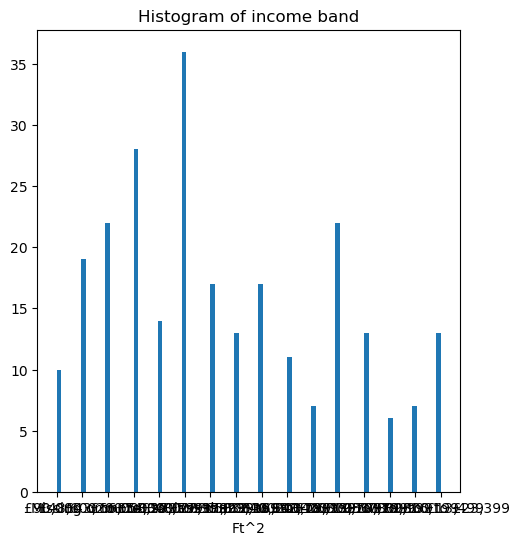

In [21]:
import matplotlib.pyplot as plt
#import scipy.stats as stats
import seaborn as sns
from matplotlib import rcParams

fig = plt.figure(figsize=(12, 6))
inc = fig.add_subplot(121)
#smart_auto = fig.add_subplot(122)
inc.hist(home_df.income_band,bins=80)
inc.set_xlabel('Ft^2')
inc.set_title("Histogram of income band")
#smart_auto.hist(home_df.smart_automation,bins=80)
#smart_auto.set_xlabel('Price ($)')
#smart_auto.set_title("Histogram of Housing Prices")
plt.show()

In [173]:
rooms_df = mdi.metadata.rooms['room']

In [22]:
rooms_df.describe()

NameError: name 'rooms_df' is not defined

In [23]:
tariff_df.describe()

,homeid,daily_standing_charge_pence,unit_charge_pence_per_kwh
count,566.000000,560.000000,546.000000
mean,177.245583,20.655732,8.582839
std,76.320666,11.790715,5.821760
min,59.000000,0.000000,0.110000
25%,102.000000,16.000000,3.270000
50%,175.000000,22.000000,4.920000
75%,242.750000,26.000000,13.390000
max,335.000000,206.000000,38.120000


In [24]:
print(len(tariff_df.homeid.unique()))
print(tariff_df.columns)
print(tariff_df.energytype.unique())

197
Index(['homeid', 'notification_date', 'provenancedetail', 'energytype',
       'daily_standing_charge_pence', 'unit_charge_pence_per_kwh'],
      dtype='object')
['electricity' 'gas']


In [25]:
tariff_df2 = tariff_df[(tariff_df['energytype'] == "electricity")]
print(len(tariff_df2))
print("Unique homeids: ")
print(len(tariff_df2.homeid.unique()))
print(tariff_df2.columns)

tariff_df2
tariff_df2.unit_charge_pence_per_kwh = tariff_df2['unit_charge_pence_per_kwh'].fillna(tariff_df2['unit_charge_pence_per_kwh'].mean())
tariff_df2.unit_charge_pence_per_kwh.isnull().sum()
tariff_df2.daily_standing_charge_pence = tariff_df2['daily_standing_charge_pence'].fillna(tariff_df2['daily_standing_charge_pence'].mean())

281
Unique homeids: 
194
Index(['homeid', 'notification_date', 'provenancedetail', 'energytype',
       'daily_standing_charge_pence', 'unit_charge_pence_per_kwh'],
      dtype='object')


/var/folders/_0/0ph25fgd2sv30yzsv450ry5r0000gn/T/ipykernel_1676/2632248524.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tariff_df2.unit_charge_pence_per_kwh = tariff_df2['unit_charge_pence_per_kwh'].fillna(tariff_df2['unit_charge_pence_per_kwh'].mean())
/var/folders/_0/0ph25fgd2sv30yzsv450ry5r0000gn/T/ipykernel_1676/2632248524.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tariff_df2.daily_standing_charge_pence = tariff_df2['daily_standing_charge_pence'].fillna(tariff_df2['daily_standing_charge

In [26]:
tariff_df3 = tariff_df2.groupby('homeid')['unit_charge_pence_per_kwh'].mean()
tariff_df3 = tariff_df3.reset_index()
#sort_values('daily_standing_charge_pence')

tariff_df3.isnull().sum()
tariff_df3
#tariff_df3
#tariff_df3.unit_charge_pence_per_kwh = tariff_df3['unit_charge_pence_per_kwh'].fillna(tariff_df3['unit_charge_pence_per_kwh'].mean())
#tariff_df3.unit_charge_pence_per_kwh.isnull().sum()
#tariff_df3.daily_standing_charge_pence = tariff_df3['daily_standing_charge_pence'].fillna(tariff_df3['daily_standing_charge_pence'].mean())


,homeid,unit_charge_pence_per_kwh
0,59,16.500000
1,61,0.120000
2,62,14.677721
3,64,13.336667
4,65,14.097721
...,...,...
189,320,14.430000
190,321,3.750000
191,332,16.390000
192,334,11.970000


In [27]:
home_df = mdi.metadata.homes['home']
meter_df["date"].max()
#TODO: Add column for precipitation hours
#TODO: Add column for solar radiation data

'2018-06-29'

In [28]:
#X = np.array(X)
wcss = []
#X = X.values.reshape(-1,1)
'''
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.intertia_)
    '''
kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

NameError: name 'KMeans' is not defined

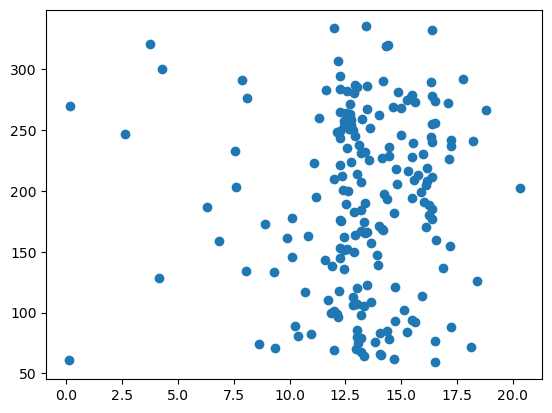

In [29]:
plt.scatter(tariff_df3['unit_charge_pence_per_kwh'],tariff_df3['homeid'])

plt.show()


In [30]:
home_df.income_band.unique()
home_df['income_band']
print(home_df.income_band.unique())
income_groups = home_df.groupby('income_band')
missing_incomes = income_groups.get_group("Missing")
i1 = pd.concat([income_groups.get_group("£13,500 to £16,199") , income_groups.get_group("£10,800 to £13,499"), income_groups.get_group("less than £10,800")])
print(i1.income_band.unique())
i2 = pd.concat([income_groups.get_group("£16,200 to £19,799") , income_groups.get_group("£19,800 to £23,399"), income_groups.get_group("£23,400 to £26,999")])
print(i2.income_band.unique())
i3 = pd.concat([income_groups.get_group("£27,000 to £32,399"), income_groups.get_group("£32,400 to £37,799"), income_groups.get_group("£37,800 to £43,199"),income_groups.get_group("Missing") ])
print("I3: ",i3.income_band.unique())
i4 = pd.concat([income_groups.get_group("£43,200 to £48,599"),income_groups.get_group("£48,600 to £53,999"),income_groups.get_group("£54,000 to £65,999")])
print("I4: ",i4.income_band.unique())
i5 = pd.concat([income_groups.get_group("£66,000 to £77,999"),income_groups.get_group("£78,000 to £89,999"), income_groups.get_group("£90,000 or more")])
print("I5: ",i5.income_band.unique())

['Missing' '£90,000 or more' '£48,600 to £53,999' '£43,200 to £48,599'
 '£66,000 to £77,999' '£54,000 to £65,999' '£27,000 to £32,399'
 'less than £10,800' '£37,800 to £43,199' '£23,400 to £26,999'
 '£16,200 to £19,799' '£32,400 to £37,799' '£78,000 to £89,999'
 '£13,500 to £16,199' '£10,800 to £13,499' '£19,800 to £23,399']
['£13,500 to £16,199' '£10,800 to £13,499' 'less than £10,800']
['£16,200 to £19,799' '£19,800 to £23,399' '£23,400 to £26,999']
I3:  ['£27,000 to £32,399' '£32,400 to £37,799' '£37,800 to £43,199' 'Missing']
I4:  ['£43,200 to £48,599' '£48,600 to £53,999' '£54,000 to £65,999']
I5:  ['£66,000 to £77,999' '£78,000 to £89,999' '£90,000 or more']


In [31]:
count_automation_1 = []
count_automation_2 = []

In [32]:
# Tariff analysis for each income groups

'''
1. LOWER INCOME GROUP
Gross income : £16,199 and lower

'''
tariff_df3.loc[tariff_df3.homeid == 59]
#tariff_df3.homeid
tariff_df3 = tariff_df3.loc[tariff_df3.unit_charge_pence_per_kwh != 0.00]


i1 = i1[['homeid','install_type','income_band','residents','smart_automation','smart_monitors']]
print(type(i1.homeid))
print(type(tariff_df3.homeid))
unit_charge = []
for id in i1.homeid:
    if tariff_df3.loc[tariff_df3.homeid == id].empty == False:
        unit_charge.append(tariff_df3.loc[tariff_df3.homeid == id]['unit_charge_pence_per_kwh'].values[0])
    else:
        unit_charge.append(np.nan)
print(unit_charge)
i1['unit_charge_pence_per_kwh'] = unit_charge
i1['unit_charge_pence_per_kwh'] = i1['unit_charge_pence_per_kwh'].fillna(i1['unit_charge_pence_per_kwh'].mean())

i1["income_band"] = 1
i1

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
[13.015, 14.723333333333334, 14.0, 14.67, 15.32, nan, nan, 9.87, 15.27, 13.48, 16.35, nan, nan, 12.975000000000001, 12.01, 13.05, nan, 15.935, nan, 12.23, nan, 13.365, 12.26, 11.075, 13.38, 11.97]


,homeid,install_type,income_band,residents,smart_automation,smart_monitors,unit_charge_pence_per_kwh
51,120,standard,1,1,Don't own,Don't own,13.015000
52,121,standard,1,2,Don't own,Don't own,14.723333
96,171,enhanced,1,0,NaN,Don't own,14.000000
110,182,standard,1,4,Don't own,Don't own,14.670000
137,216,standard,1,1,Don't own,Don't own,15.320000
222,303,standard,1,1,Don't own,Don't own,13.418333
65,135,standard,1,2,Don't own,Don't own,13.418333
92,161,standard,1,2,Don't own,Don't own,9.870000
197,275,standard,1,1,Don't own,Don't own,15.270000
208,286,standard,1,1,Don't own,Don't own,13.480000


In [33]:
#i1

count_automation_1.append(len(i1[i1.smart_automation == "Own and use"]))
count_automation_2.append(len(i1[i1.smart_automation == "Don't own"]))


In [34]:
print(type(tariff_df3.loc[tariff_df3.homeid == 100]['unit_charge_pence_per_kwh']))
t = tariff_df3.iloc[0]['unit_charge_pence_per_kwh']

tariff_df3.loc[tariff_df3.homeid == 100]['unit_charge_pence_per_kwh'].values[0]


<class 'pandas.core.series.Series'>


11.876666666666667

In [35]:
#i1 = i1.assign(daily_standing_charge_pence = t)
tariff_df3.loc[tariff_df3.homeid == 441].empty

True

In [36]:
# Tariff analysis for each income groups

'''
2. LOWER MIDDLE INCOME GROUP
Gross income : £16200 - £26900

'''
i2 = i2[['homeid','install_type','income_band','residents','smart_automation','smart_monitors']]
#print(type(i2.homeid))
#print(type(tariff_df3.homeid))
unit_charge = []
for id in i2.homeid:
    if tariff_df3.loc[tariff_df3.homeid == id].empty == False:
        unit_charge.append(tariff_df3.loc[tariff_df3.homeid == id]['unit_charge_pence_per_kwh'].values[0])
    else:
        unit_charge.append(np.nan)
print(unit_charge)
i2['unit_charge_pence_per_kwh'] = unit_charge
i2.unit_charge_pence_per_kwh = i2['unit_charge_pence_per_kwh'].fillna(i2['unit_charge_pence_per_kwh'].mean())
#i2
count_automation_1.append(len(i2[i2.smart_automation == "Own and use"]))
count_automation_2.append(len(i2[i2.smart_automation == "Don't own"]))

i2["income_band"] = 2
i2

[9.34, 15.5, nan, nan, 14.303333333333333, nan, nan, 16.25, 11.17, 14.22, 12.25, nan, 14.1425, 12.26, 16.35, 16.39, nan, nan, nan, nan, 8.618480392156863, 14.453333333333333, 13.0, 14.05, 13.03, nan, 4.14, 12.36, 13.25, 16.51, 15.45]


,homeid,install_type,income_band,residents,smart_automation,smart_monitors,unit_charge_pence_per_kwh
17,71,standard,2,1,Don't own,Don't own,9.340000
122,194,standard,2,1,Don't own,Don't own,15.500000
162,234,standard,2,1,Don't own,Don't own,13.192269
232,311,enhanced,2,2,Don't own,Don't own,13.192269
238,319,standard,2,2,Own and use,Own and use,14.303333
243,326,standard,2,4,Don't own,Don't own,13.192269
249,329,standard,2,2,Don't own,Don't own,13.192269
114,188,standard,2,3,Don't own,Don't own,16.250000
123,195,standard,2,4,Don't own,Don't own,11.170000
124,197,standard,2,1,Don't own,Don't own,14.220000


In [37]:
# Consumption analysis for households of different income groups

In [38]:
'''
3. MIDDLE INCOME GROUP
Gross income : £27000 - £27900

'''
i3 = i3[['homeid','install_type','income_band','residents','smart_automation','smart_monitors']]
print(i3.smart_automation.unique())
print(type(i3.homeid))
print(type(tariff_df3.homeid))
unit_charge = []
for id in i3.homeid:
    if tariff_df3.loc[tariff_df3.homeid == id].empty == False:
        unit_charge.append(tariff_df3.loc[tariff_df3.homeid == id]['unit_charge_pence_per_kwh'].values[0])
    else:
        unit_charge.append(np.nan)
#print(unit_charge)
i3['unit_charge_pence_per_kwh'] = unit_charge
#i3
i3['unit_charge_pence_per_kwh'] = i3['unit_charge_pence_per_kwh'].fillna(i3['unit_charge_pence_per_kwh'].mean())
count_automation_1.append(len(i3[i3.smart_automation == "Own and use"]))
count_automation_2.append(len(i3[i3.smart_automation == "Don't own"]))
i3["income_band"] = 3

["Don't own" 'Own and use']
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [39]:
'''
4. UPPER MIDDLE INCOME GROUP
Gross income : £27000 - £27900

'''
i4 = i4[['homeid','install_type','income_band','residents','smart_automation','smart_monitors']]
print(type(i4.homeid))
print(type(tariff_df3.homeid))
unit_charge = []
for id in i4.homeid:
    if tariff_df3.loc[tariff_df3.homeid == id].empty == False:
        unit_charge.append(tariff_df3.loc[tariff_df3.homeid == id]['unit_charge_pence_per_kwh'].values[0])
    else:
        unit_charge.append(np.nan)
#print(unit_charge)
i4['unit_charge_pence_per_kwh'] = unit_charge
#i3
i4['unit_charge_pence_per_kwh'] = i4['unit_charge_pence_per_kwh'].fillna(i4['unit_charge_pence_per_kwh'].mean())
count_automation_i4 = []
count_automation_1.append(len(i4[i4.smart_automation == "Own and use"]))
count_automation_2.append(len(i4[i4.smart_automation == "Don't own"]))
i4["income_band"] = 4

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [40]:
'''
5. UPPER INCOME GROUP
Gross income : £27000 - £27900
'''
i5 = i5[['homeid','install_type','income_band','residents','smart_automation','smart_monitors']]
print(type(i4.homeid))
print(type(tariff_df3.homeid))
unit_charge = []
for id in i5.homeid:
    if tariff_df3.loc[tariff_df3.homeid == id].empty == False:
        unit_charge.append(tariff_df3.loc[tariff_df3.homeid == id]['unit_charge_pence_per_kwh'].values[0])
    else:
        unit_charge.append(np.nan)
#print(unit_charge)
i5['unit_charge_pence_per_kwh'] = unit_charge
#i3
count_automation_i5 = []
count_automation_1.append(len(i5[i5.smart_automation == "Own and use"]))
count_automation_2.append(len(i5[i5.smart_automation == "Don't own"]))
i5['unit_charge_pence_per_kwh'] = i5['unit_charge_pence_per_kwh'].fillna(i5['unit_charge_pence_per_kwh'].mean())

i5["income_band"] = 5

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [237]:
'''
6. HIGH INCOME GROUP
Gross income : £27000 - £27900

'''
i6 = i6[['homeid','install_type','income_band','residents','smart_automation','smart_monitors']]
print(type(i6.homeid))
print(type(tariff_df3.homeid))
unit_charge = []
for id in i6.homeid:
    if tariff_df3.loc[tariff_df3.homeid == id].empty == False:
        unit_charge.append(tariff_df3.loc[tariff_df3.homeid == id]['unit_charge_pence_per_kwh'].values[0])
    else:
        unit_charge.append(np.nan)
#print(unit_charge)
i6['unit_charge_pence_per_kwh'] = unit_charge
#i3
i6['unit_charge_pence_per_kwh'] = i6['unit_charge_pence_per_kwh'].fillna(i6['unit_charge_pence_per_kwh'].mean())
count_automation_i6 = []
#count_automation_1.append(len(i6[i6.smart_automation == "Own and use"]))
#count_automation_2.append(len(i6[i6.smart_automation == "Don't own"]))
len(count_automation_2)
i6["income_band"] = 6


NameError: name 'i6' is not defined

In [41]:
#fig = plt.figure(figsize=(12, 6))
#inc = fig.add_subplot(121)
#smart_auto = fig.add_subplot(122)
inc.hist(consumption_df.income_band,bins=80)
inc.set_xlabel('Ft^2')
inc.set_title("Histogram of income band")
#smart_auto.hist(home_df.smart_automation,bins=80)
#smart_auto.set_xlabel('Price ($)')
#smart_auto.set_title("Histogram of Housing Prices")
plt.show()

NameError: name 'consumption_df' is not defined

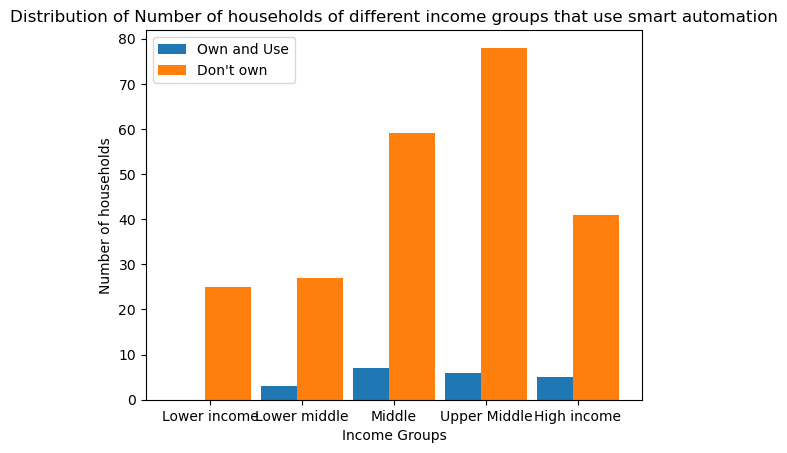

In [239]:
import numpy as np
import matplotlib.pyplot as plt

X = ['Lower income','Lower middle','Middle','Upper Middle', 'High income']
X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, count_automation_1, 0.5, label = 'Own and Use')
plt.bar(X_axis + 0.2, count_automation_2, 0.5, label = 'Don\'t own')



plt.xticks(X_axis, X)
plt.xlabel("Income Groups")
plt.ylabel("Number of households")
plt.title("Distribution of Number of households of different income groups that use smart automation")
plt.legend()
plt.show()


In [42]:
# Meter reading
import datetime
meter_df = mdi.metadata.meterreading["meterreading"]
meter_df = meter_df.loc[meter_df["energytype"] == "electricity"]
homeids = meter_df["homeid"]
meter_df.sort_values("homeid")
#print(meter_df.provenancedetail.unique())
init_reading =  meter_df.loc[meter_df["provenancedetail"] == "installation_visit"]
#print(init_reading.sort_values(by=['homeid']))
next_reading = meter_df.loc[meter_df["provenancedetail"] != "installation_visit"]
next_reading = next_reading.loc[meter_df["provenancedetail"] != "repair_visit"]
#next_reading = next_reading.loc[next_reading["homeid"] >= 100]
#next_reading = next_reading.groupby("homeid")['reading'].sum()

#print(next_reading.sort_values(by=['homeid']))
#date1 = repair_visits[repair_visits["homeid"]==113].date.values[0] 
#year, month, day = repair_visits[repair_visits["homeid"]==113].date.values[0].split("-")
groups = meter_df.groupby('homeid').size()
readings = {}

for id in meter_df.homeid:
    if id in groups and groups[id] > 1:
        reading_values = meter_df[meter_df['homeid'] == id].reading.values[0:2]
        dates = meter_df[meter_df['homeid'] == id].date.values[0:2]
        year1,month1,day1 = dates[0].split('-')
        date1 = datetime.datetime(int(year1),int(month1),int(day1))
        year2,month2,day2 = dates[1].split('-')
        date2 = datetime.datetime(int(year2),int(month2),int(day2))
        date = date1-date2
        days = date.days
        if date.days < 1:
            days = date.days*(-1)
        rdg = round(reading_values[1] - reading_values[0],2)
        if rdg < 1:
            rdg = rdg * (-1)
        readings[id] = [days, rdg]
print(meter_df[meter_df['homeid'] == 126])
readings

     homeid  provenance    provenancedetail   energytype        date   reading
32      126  technician  installation_visit  electricity  2017-06-15  839560.0
493     126         752         all_web_end  electricity  2018-06-12   83956.0


{79: [147, 1344.0],
 113: [176, 1825.0],
 114: [356, 1755.0],
 117: [173, 1334.0],
 120: [182, 78334.0],
 121: [345, 3414.0],
 126: [362, 755604.0],
 128: [172, 671.0],
 133: [196, 1997.0],
 136: [331, 3108.0],
 138: [324, 2932.0],
 139: [163, 623.0],
 146: [156, 3649.64],
 149: [149, 995.0],
 150: [152, 577.0],
 151: [153, 73179.0],
 153: [143, 711.0],
 155: [140, 1088.0],
 158: [309, 2337.0],
 162: [120, 1143.0],
 163: [237, 1711.0],
 164: [321, 4559.0],
 165: [300, 1581.0],
 168: [134, 2075.0],
 170: [302, 43852.0],
 175: [109, 1345.0],
 178: [110, 804.0],
 180: [140, 2797.0],
 182: [139, 2061.0],
 185: [273, 2043.0],
 186: [257, 1714.0],
 187: [273, 38025.0],
 190: [56, -0.0],
 193: [80, 607.0],
 194: [79, 292.0],
 195: [252, 1784.0],
 197: [79, 337.0],
 201: [73, 755.0],
 203: [67, 372.0],
 205: [64, 330.0],
 208: [64, 599.0],
 209: [248, 607.0],
 212: [254, 564.0],
 215: [94, 210993.0],
 216: [62, 119.0],
 221: [56, 233.0],
 222: [154, 2763.0],
 224: [161, 1192.0],
 225: [226, 12

In [43]:
# Monthly consumption
import statistics
monthly_readings = {}
for r in readings:
    if readings[r][0] != 0 and 0 < readings[r][1] and 4000 > readings[r][1]:
        monthly_rdg = round(readings[r][1]/readings[r][0]*30,2)
        if monthly_rdg < 800:
            monthly_readings[int(r)] = monthly_rdg
    else:
        monthly_readings[int(r)] = 0
len(monthly_readings)
vals = list(monthly_readings.values())
print("vals: ",vals)
avg_monthly_reading = statistics.mean(vals)
print("average: ",avg_monthly_reading)
for r in monthly_readings:
    if monthly_readings[r] == 0:
        monthly_readings[r] = round(avg_monthly_reading,2)
#monthly_readings

vals:  [274.29, 311.08, 147.89, 231.33, 0, 296.87, 0, 117.03, 305.66, 281.69, 271.48, 114.66, 701.85, 200.34, 113.88, 0, 149.16, 233.14, 226.89, 285.75, 216.58, 0, 158.1, 464.55, 0, 370.18, 219.27, 599.36, 444.82, 224.51, 200.08, 0, 0, 227.62, 110.89, 212.38, 127.97, 310.27, 166.57, 154.69, 280.78, 73.43, 66.61, 0, 57.58, 124.82, 538.25, 222.11, 161.68, 168.37, 435.0, 415.33, 323.72, 0, 336.28, 111.5, 282.63, 138.53, 256.67, 255.23, 0, 204.0, 110.87, 157.06, 0, 147.0, 210.0, 448.76, 352.17, 213.33, 0, 108.82, 776.36, 517.73, 362.06, 108.5, 188.08, 264.27, 289.93, 219.47, 457.81, 118.4, 159.09, 181.96, 300.0, 100.43, 131.36, 424.59, 133.42, 0, 0, 155.94, 196.8, 0, 92.0, 112.33, 165.0, 108.89, 0, 279.53, 167.06, 132.57, 368.75, 7.69, 0, 67.19, 438.42]
average:  202.7756074766355


<class 'dict_keys'>


<BarContainer object of 107 artists>

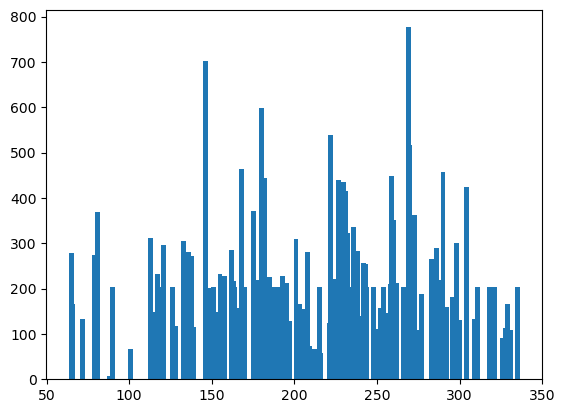

In [44]:
import matplotlib.pyplot as plt
X = monthly_readings.keys()
Y = monthly_readings.values()
print(type(X))
plt.bar(X,Y,width=3)

In [45]:
consumption_i1, consumption_i2, consumption_i3, consumption_i4, consumption_i5, consumption_i6 = [[] for i in range(6)]

for id in monthly_readings:
    if id in i1.homeid:
        consumption_i1.append(monthly_readings[id])
    elif id in i2.homeid:
        consumption_i2.append(monthly_readings[id])
    elif id in i3.homeid:
        consumption_i3.append(monthly_readings[id])
    elif id in i4.homeid:
        consumption_i4.append(monthly_readings[id])
    elif id in i5.homeid:
        consumption_i5.append(monthly_readings[id])
    else:
        #print("present in none of i")
        consumption_i3.append(monthly_readings[id])
        

print(consumption_i3)
    
#len(monthly_readings)

[274.29, 311.08, 231.33, 117.03, 233.14, 216.58, 158.1, 599.36, 444.82, 200.08, 227.62, 166.57, 161.68, 168.37, 111.5, 138.53, 202.78, 204.0, 110.87, 147.0, 210.0, 448.76, 352.17, 213.33, 202.78, 108.82, 776.36, 517.73, 362.06, 108.5, 188.08, 264.27, 289.93, 219.47, 457.81, 118.4, 159.09, 181.96, 300.0, 100.43, 131.36, 424.59, 133.42, 202.78, 202.78, 155.94, 196.8, 202.78, 92.0, 112.33, 165.0, 108.89, 202.78, 67.19]


{'whiskers': [<matplotlib.lines.Line2D at 0x135eeb750>,
 'caps': [<matplotlib.lines.Line2D at 0x135ef8b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x135ec12d0>,
 'medians': [<matplotlib.lines.Line2D at 0x135ef9bd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x135efa490>,
 'means': []}

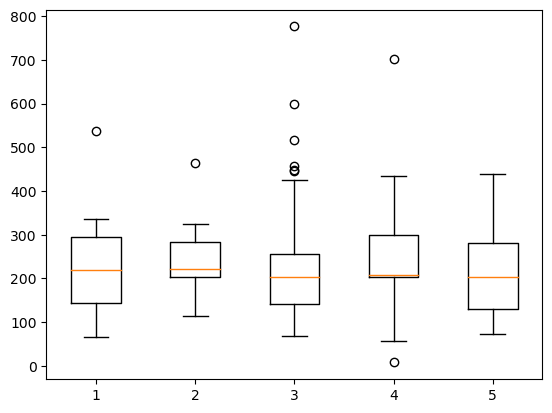

In [46]:
plt.boxplot([consumption_i1,consumption_i2,consumption_i3, consumption_i4, consumption_i5])

In [47]:
# Consumption by family size

small_families = home_df[home_df.residents <= 2]
medium_families = home_df[(home_df.residents == 3) | (home_df.residents == 4)]
large_families = home_df[home_df.residents > 4]
small_families = small_families[["homeid","residents","location","income_band","urban_rural_name","occupied_days","occupied_nights"]]
medium_families = medium_families[["homeid","residents","location","income_band","urban_rural_name","occupied_days","occupied_nights"]]
large_families = large_families[["homeid","residents","location","income_band","urban_rural_name","occupied_days","occupied_nights"]]
#Consumption analysis - small families
c = []
for id in small_families.homeid:
    if id in monthly_readings:
        c.append(monthly_readings[id]) 
    else:
        c.append(np.nan)
small_families["monthly_consumption"] = c

small_families_df = small_families.dropna()
small_families["monthly_consumption"] = small_families["monthly_consumption"].fillna(small_families["monthly_consumption"].mean())

In [48]:
#Medium Families 
c = []
for id in medium_families.homeid:
    if id in monthly_readings:

        c.append(monthly_readings[id]) 
    else:
        c.append(np.nan) 
medium_families["monthly_consumption"] = c
medium_families_df = medium_families.dropna()
medium_families["monthly_consumption"] = medium_families["monthly_consumption"].fillna(medium_families["monthly_consumption"].mean())

In [49]:
#Large families

#Medium Families 
c = []
for id in large_families.homeid:
    if id in monthly_readings:
        c.append(monthly_readings[id]) 
    else:
        c.append(np.nan) 
large_families["monthly_consumption"] = c
large_families_df = large_families.dropna()
large_families["monthly_consumption"] = large_families["monthly_consumption"].fillna(large_families["monthly_consumption"].mean())

/var/folders/_0/0ph25fgd2sv30yzsv450ry5r0000gn/T/ipykernel_1676/1309904263.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  consumption_df = (small_families.append(medium_families).append(large_families))
/var/folders/_0/0ph25fgd2sv30yzsv450ry5r0000gn/T/ipykernel_1676/1309904263.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  consumption_df = (small_families.append(medium_families).append(large_families))


([<matplotlib.axis.XTick at 0x135f695d0>,
 [Text(1, 0, 'Small families'),
  Text(2, 0, 'Medium Families'),
  Text(3, 0, 'Large families')])

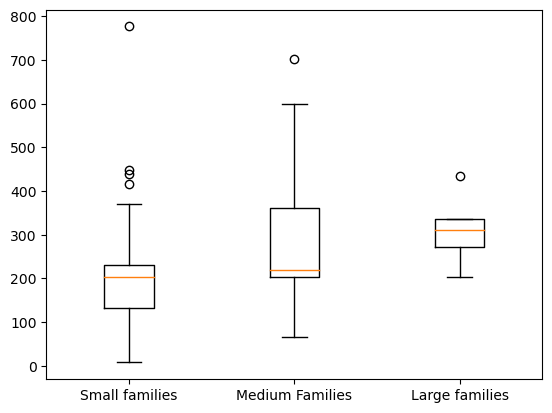

In [50]:
consumption_df = (small_families.append(medium_families).append(large_families))
#consumption_df 
#Y = consumption_df.monthly_consumption
plt.boxplot([small_families_df.monthly_consumption,medium_families_df.monthly_consumption,large_families_df.monthly_consumption])
plt.xticks([1,2,3],['Small families', 'Medium Families', 'Large families'])

In [51]:
df2 = tariff_df[tariff_df["homeid"] == 65]
np.isnan(df2.unit_charge_pence_per_kwh.values[0])

True

In [52]:
# Using X: Unit charge per kwh
from cmath import nan

monthly_cost = {}

for id in consumption_df.homeid:
    if id in tariff_df3.homeid.values:
        df = consumption_df.loc[consumption_df["homeid"] == id]
        df2 = tariff_df2[tariff_df2["homeid"] == id]
        #print("values: ",df2.daily_standing_charge_pence.values[0])
        #print("more values: ",df.monthly_consumption.values[0]* df2.unit_charge_pence_per_kwh.values[0] * 0.01)
        if not(np.isnan(df2.daily_standing_charge_pence.values[0])) and not(np.isnan(df2.unit_charge_pence_per_kwh.values[0])):
            monthly_cost[id] = round(df2.daily_standing_charge_pence.values[0] + (df.monthly_consumption.values[0]* df2.unit_charge_pence_per_kwh.values[0] * 0.01),2)

#consumption_df.sort_values("homeid")
monthly_cost = dict(sorted(monthly_cost.items(), key = lambda x:x[1], reverse = True))
print(monthly_cost)
X = monthly_cost.keys()
Y = monthly_cost.values()


{269: 144.38, 146: 114.64, 180: 113.4, 290: 97.92, 230: 89.51, 273: 86.55, 208: 81.37, 236: 80.91, 168: 79.92, 266: 79.42, 231: 78.74, 259: 77.46, 92: 74.54, 93: 74.47, 227: 72.99, 218: 71.99, 121: 71.53, 246: 69.57, 219: 69.31, 210: 68.03, 206: 67.03, 182: 66.86, 238: 66.05, 280: 65.52, 147: 65.35, 98: 65.3, 175: 64.5, 187: 64.33, 64: 64.1, 207: 63.4, 232: 63.31, 174: 62.88, 282: 62.52, 211: 62.51, 255: 62.51, 160: 62.18, 188: 62.11, 178: 61.62, 177: 61.51, 199: 61.06, 113: 61.0, 289: 60.7, 264: 60.56, 143: 60.47, 249: 60.23, 200: 60.21, 100: 60.17, 244: 60.15, 274: 60.03, 94: 59.95, 228: 59.95, 279: 59.95, 176: 59.79, 284: 59.79, 265: 59.76, 283: 59.73, 193: 59.71, 245: 59.66, 213: 59.47, 260: 58.94, 62: 58.51, 76: 58.46, 152: 58.14, 202: 57.87, 96: 57.77, 169: 57.76, 241: 57.56, 307: 57.56, 201: 57.47, 320: 57.4, 243: 56.29, 286: 56.08, 109: 55.76, 334: 55.25, 229: 55.22, 99: 55.08, 86: 54.83, 102: 54.69, 78: 54.64, 69: 54.52, 77: 54.45, 75: 54.21, 123: 54.2, 166: 54.2, 85: 53.73, 1

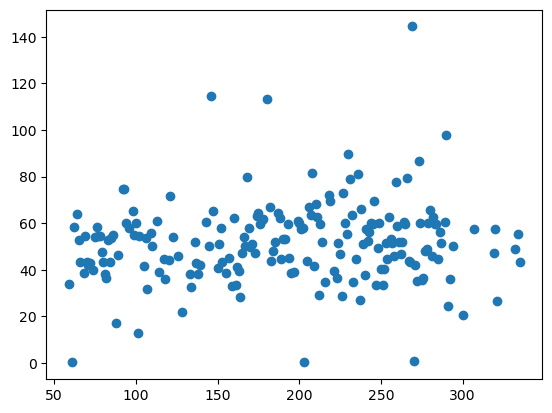

In [53]:
plt.scatter(monthly_cost.keys(),monthly_cost.values())


In [54]:
consumption_df = i1.append(i2).append(i3).append(i4).append(i5)
#consumption_df
c = []
for id in consumption_df.homeid:

    if id in monthly_readings:
        c.append(monthly_readings[id]) 
    else:
        #if()
        if(not(i1[i1.homeid == id].empty)):
            c.append(sum(consumption_i1)/len(consumption_i1))
        elif(not(i2[i2.homeid == id].empty)):
            c.append(sum(consumption_i2)/len(consumption_i2))
        elif(not(i3[i3.homeid == id].empty)):
            c.append(sum(consumption_i3)/len(consumption_i3))
        elif(not(i4[i4.homeid == id].empty)):
            c.append(sum(consumption_i4)/len(consumption_i4))
        elif(not(i5[i5.homeid == id].empty)):
            c.append(sum(consumption_i5)/len(consumption_i5))
        else:
            c.append(np.nan)


        #c.append(np.nan)
consumption_df["monthly_consumption"] = c
#consumption_df["monthly_consumption"] = consumption_df["monthly_consumption"].fillna(consumption_df["monthly_consumption"].mean())
consumption_df
#i1[i1.homeid == 120].empty

/var/folders/_0/0ph25fgd2sv30yzsv450ry5r0000gn/T/ipykernel_1676/1569341848.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  consumption_df = i1.append(i2).append(i3).append(i4).append(i5)
/var/folders/_0/0ph25fgd2sv30yzsv450ry5r0000gn/T/ipykernel_1676/1569341848.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  consumption_df = i1.append(i2).append(i3).append(i4).append(i5)
/var/folders/_0/0ph25fgd2sv30yzsv450ry5r0000gn/T/ipykernel_1676/1569341848.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  consumption_df = i1.append(i2).append(i3).append(i4).append(i5)
/var/folders/_0/0ph25fgd2sv30yzsv450ry5r0000gn/T/ipykernel_1676/1569341848.py:1: FutureWarning: The frame.append method is deprecated and will be removed from p

,homeid,install_type,income_band,residents,smart_automation,smart_monitors,unit_charge_pence_per_kwh,monthly_consumption
51,120,standard,1,1,Don't own,Don't own,13.015000,202.780
52,121,standard,1,2,Don't own,Don't own,14.723333,296.870
96,171,enhanced,1,0,NaN,Don't own,14.000000,241.955
110,182,standard,1,4,Don't own,Don't own,14.670000,444.820
137,216,standard,1,1,Don't own,Don't own,15.320000,57.580
...,...,...,...,...,...,...,...,...
184,261,standard,5,3,Own and use,Don't own,12.690000,220.130
213,287,standard,5,4,Don't own,Don't own,12.920000,219.470
217,295,standard,5,1,Don't own,Don't own,13.075781,220.130
227,316,standard,5,4,Don't own,Own and use,13.075781,220.130


([<matplotlib.patches.Wedge at 0x136095e90>,
 [Text(1.044048436945249, 0.3463565522870654, 'Lower Income'),
  Text(0.5733033624608467, 0.938788184092177, 'Lower Middle Income'),
  Text(-0.662898148362676, 0.8778189134994391, 'Middle Income'),
  Text(-0.6410695419865502, -0.8938846918574873, 'Upper Middle Income'),
  Text(0.9280339655028453, -0.5905530957272715, 'High Income')],
 [Text(0.5694809656064994, 0.18892175579294473, '10.2%'),
  Text(0.3127109249786436, 0.5120662822320965, '12.2%'),
  Text(-0.3615808081978233, 0.47881031645423944, '25.9%'),
  Text(-0.34967429562902735, -0.4875734682859021, '33.7%'),
  Text(0.5062003448197337, -0.32211987039669354, '18.0%')])

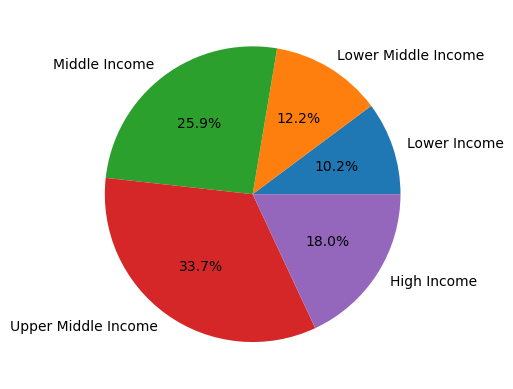

In [55]:
#plt.style.use('ggplot')
#inc = fig.add_subplot(131)
#smart_auto = fig.add_subplot(122)
#inc.hist(consumption_df.income_band,bins=20)
#plt.bar(consumption_df.income_band,)
#plt.legend(prop={'size': 5 })
#plt.xticks([1,2,3,4,5],["Lower Income","Lower Middle Income","Middle Income","Upper Middle Income","High Income"])
labels = "Lower Income","Lower Middle Income","Middle Income","Upper Middle Income","High Income"
sizes = [i1.size,i2.size,i3.size,i4.size,i5.size]
plt.pie(sizes,labels=labels,autopct='%1.1f%%')
#plt.title('Histogram of Income bands')
#plt.show()


In [57]:

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

scaler = preprocessing.MinMaxScaler()
features = consumption_df
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
#label1 = le.fit_transform(features["income_band"])
#label2 = le.fit_transform(features["location"])
#label3 = le.fit_transform(features["urban_rural_name"])
 
# printing label
#features["income_band"] = label1
#features["location"] = label2
#features["urban_rural_name"] = label3
#features_normal = scaler.fit_transform(x)

features

,homeid,install_type,income_band,residents,smart_automation,smart_monitors,unit_charge_pence_per_kwh,monthly_consumption
51,120,standard,1,1,Don't own,Don't own,13.015000,202.780
52,121,standard,1,2,Don't own,Don't own,14.723333,296.870
96,171,enhanced,1,0,NaN,Don't own,14.000000,241.955
110,182,standard,1,4,Don't own,Don't own,14.670000,444.820
137,216,standard,1,1,Don't own,Don't own,15.320000,57.580
...,...,...,...,...,...,...,...,...
184,261,standard,5,3,Own and use,Don't own,12.690000,220.130
213,287,standard,5,4,Don't own,Don't own,12.920000,219.470
217,295,standard,5,1,Don't own,Don't own,13.075781,220.130
227,316,standard,5,4,Don't own,Own and use,13.075781,220.130


/Users/athmika/miniconda/envs/IdealDataInterface/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/athmika/miniconda/envs/IdealDataInterface/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/athmika/miniconda/envs/IdealDataInterface/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/athmika/miniconda/envs/IdealDataInterface/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

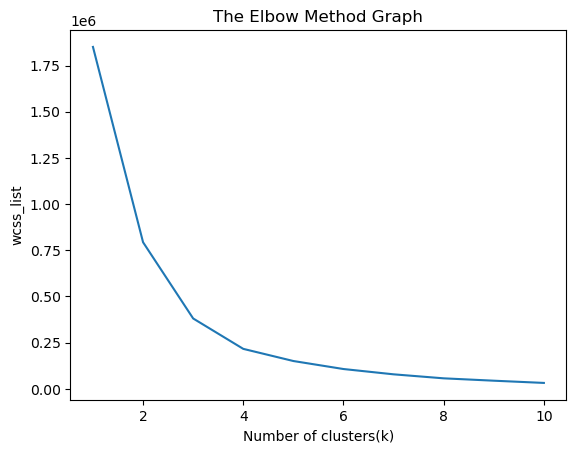

array([[  1.        , 202.78      ,   1.        ],
       [  1.        , 296.87      ,   2.        ],
       [  1.        , 241.955     ,   0.        ],
       [  1.        , 444.82      ,   4.        ],
       [  1.        ,  57.58      ,   1.        ],
       [  1.        , 241.955     ,   1.        ],
       [  1.        , 241.955     ,   2.        ],
       [  1.        , 241.955     ,   2.        ],
       [  1.        , 108.5       ,   1.        ],
       [  1.        , 289.93      ,   1.        ],
       [  1.        , 241.955     ,   1.        ],
       [  1.        , 100.43      ,   1.        ],
       [  1.        , 112.33      ,   1.        ],
       [  1.        , 241.955     ,   1.        ],
       [  1.        , 241.955     ,   4.        ],
       [  1.        , 241.955     ,   2.        ],
       [  1.        , 202.78      ,   1.        ],
       [  1.        , 147.89      ,   2.        ],
       [  1.        , 241.955     ,   2.        ],
       [  1.        , 241.955  

In [316]:
#CLUSTERING

#finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
x = features[["income_band","monthly_consumption","residents"]].values
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elbow Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()  
x

In [58]:
#training the K-means model  
kmeans = KMeans(n_clusters=4, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(x) 
features["clusters"] = y_predict
features.clusters

NameError: name 'KMeans' is not defined

In [318]:
y_predict[0]

0

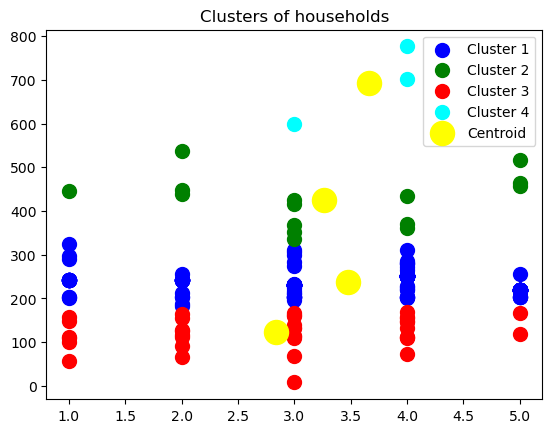

In [319]:
#visulaizing the clusters  
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
plt.scatter(x[y_predict == 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
plt.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster   
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
plt.title('Clusters of households')  
#plt.xlabel('Annual Income (k$)')  
#plt.ylabel('Spending Score (1-100)')  
plt.legend()  
plt.show()  

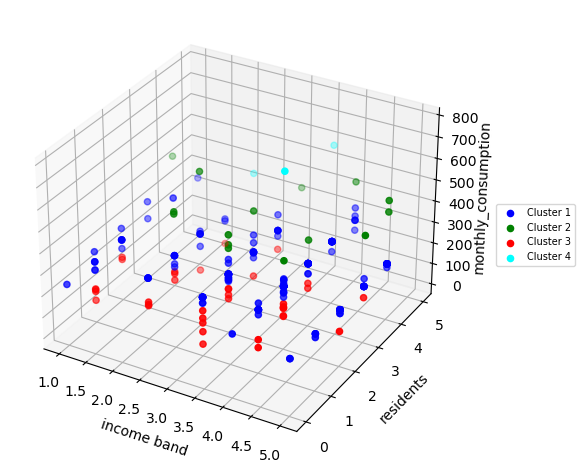

In [320]:
plt.figure()
kplot = plt.axes(projection='3d')
xline = np.linspace(0, 8, 1000)
yline = np.linspace(0, 8, 1000)
zline = np.linspace(0, 8, 1000)

c1 = features[features.clusters == 0]
c2 = features[features.clusters == 1]
c3 = features[features.clusters == 2]
c4 = features[features.clusters == 3]
plt.tight_layout()
#Cluster1
kplot.scatter3D(c1.income_band, c1.residents, c1.monthly_consumption, c='blue', label = 'Cluster 1')

#Cluster2
kplot.scatter3D(c2.income_band, c2.residents, c2.monthly_consumption, c='green', label = 'Cluster 2')

#Cluster1
kplot.scatter3D(c3.income_band, c3.residents, c3.monthly_consumption, c='red', label = 'Cluster 3')

#Cluster1
kplot.scatter3D(c4.income_band, c4.residents, c4.monthly_consumption, c='cyan', label = 'Cluster 4')
kplot.zaxis.labelpad=0
kplot.set_zlabel("monthly_consumption",rotation=90)
kplot.set_xlabel("income band")
kplot.set_ylabel("residents")
kplot.legend(loc='center left', bbox_to_anchor=(1.07, 0.5), fontsize=7)
kplot.figure.savefig("../../app/static/images/clusters.png")


In [321]:
plt.show()

In [322]:
# Carbon Intensity

import requests
headers = {
  'Accept': 'application/json'
}
r = requests.get('https://api.carbonintensity.org.uk/intensity/date/2017-01-16', params={}, headers = headers) 
print(r.json())

{'data': []}


In [381]:
groups

homeid
62     1
63     1
65     2
66     2
70     1
      ..
331    2
332    1
333    1
334    1
335    2
Length: 226, dtype: int64

In [217]:
import requests
headers = {
  'Accept': 'application/json'
}
carbon_intensities = {}
for id in meter_df.homeid:
    if id in groups and groups[id] > 1:
        dates = meter_df[meter_df['homeid'] == id].date.values[0:2]
        print("id: ",id , "dates: ",dates)
        r = requests.get('https://api.carbonintensity.org.uk/intensity/date/'+dates[1], params={}, headers = headers)
        #print(r.json())
        response = r.json()
        #if response["data"] == []:
          #print("response: ",response)
          #break
        if response["data"] != []:
          #print(response["data"][0]['intensity']['actual'])
          carbon_intensities[id] = response["data"][0]['intensity']['actual']
carbon_intensities

id:  79 dates:  ['2018-01-16' '2018-06-12']
id:  113 dates:  ['2017-06-20' '2017-12-13']
id:  114 dates:  ['2017-06-13' '2018-06-04']
id:  117 dates:  ['2017-06-20' '2017-12-10']
id:  120 dates:  ['2017-06-14' '2017-12-13']
id:  121 dates:  ['2017-06-14' '2018-05-25']
id:  126 dates:  ['2017-06-15' '2018-06-12']
id:  128 dates:  ['2017-06-22' '2017-12-11']
id:  133 dates:  ['2017-06-27' '2018-01-09']
id:  133 dates:  ['2017-06-27' '2018-01-09']
id:  136 dates:  ['2017-06-28' '2018-05-25']
id:  138 dates:  ['2017-07-04' '2018-05-24']
id:  139 dates:  ['2017-07-04' '2017-12-14']
id:  146 dates:  ['2017-07-11' '2017-12-14']
id:  149 dates:  ['2017-07-13' '2017-12-09']
id:  150 dates:  ['2017-07-14' '2017-12-13']
id:  151 dates:  ['2017-07-14' '2017-12-14']
id:  153 dates:  ['2017-07-19' '2017-12-09']
id:  155 dates:  ['2017-07-20' '2017-12-07']
id:  158 dates:  ['2017-07-25' '2018-05-30']
id:  162 dates:  ['2017-08-14' '2017-12-12']
id:  163 dates:  ['2017-08-15' '2018-04-09']
id:  163 da

{79: 232,
 113: 365,
 114: 247,
 117: 374,
 120: 365,
 121: 253,
 126: 232,
 128: 387,
 133: 234,
 136: 253,
 138: 221,
 139: 330,
 146: 330,
 149: 263,
 150: 365,
 151: 330,
 153: 263,
 155: 190,
 158: 201,
 162: 441,
 163: 273,
 164: 241,
 165: 203,
 168: 330,
 170: 265,
 175: 191,
 178: 441,
 180: 268,
 182: 166,
 185: 265,
 186: 203,
 187: 247,
 190: 234,
 193: 191,
 194: 190,
 195: 201,
 197: 330,
 201: 387,
 203: 191,
 205: 191,
 208: 263,
 209: 275,
 212: 202,
 215: 224,
 216: 330,
 221: 441,
 222: 342,
 224: 153,
 225: 258,
 226: 365,
 230: 387,
 231: 330,
 232: 202,
 235: 166,
 236: 330,
 237: 253,
 238: 387,
 240: 374,
 242: 365,
 243: 203,
 244: 203,
 248: 191,
 251: 374,
 252: 191,
 253: 365,
 254: 190,
 256: 190,
 258: 441,
 259: 202,
 260: 199,
 262: 234,
 266: 190,
 268: 232,
 269: 151,
 270: 221,
 273: 203,
 275: 251,
 277: 221,
 283: 203,
 286: 214,
 287: 253,
 290: 203,
 291: 214,
 292: 229,
 296: 153,
 298: 250,
 299: 203,
 300: 247,
 304: 214,
 309: 203,
 311: 226,


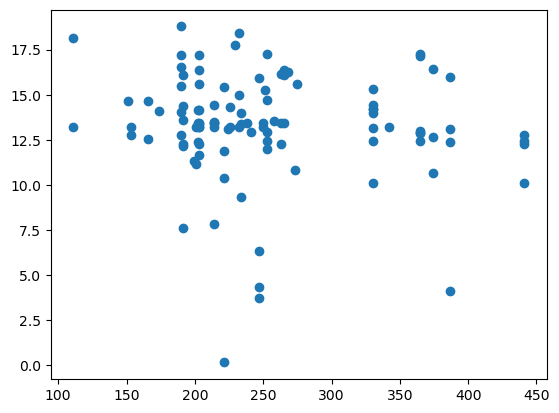

In [323]:
carbon_intensities = dict(sorted(carbon_intensities.items(), key = lambda x:x[1], reverse = True))
consumptions = []
intensities = []
for id in features.homeid:
    if id in carbon_intensities:
        intensities.append(carbon_intensities[id])
    else:
        intensities.append(np.nan)
features["carbon_intensity"] = intensities
carbon_and_consumption = features[["income_band","unit_charge_pence_per_kwh","residents","monthly_consumption","carbon_intensity"]]
carbon_and_consumption = carbon_and_consumption[carbon_and_consumption.carbon_intensity != "Missing"]

#plt.scatter(carbon_intensities.keys(),carbon_intensities.values())
#plt.scatter(consumptions,carbon_intensities.values())
#consumption_df
carbon_and_consumption
plt.scatter(carbon_and_consumption.carbon_intensity,carbon_and_consumption.unit_charge_pence_per_kwh)
#features

In [364]:
#features
#!pwd
features.to_csv('../../app/features.csv', index=False, sep="\t")

In [325]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
model = LinearRegression()
y = consumption_df["monthly_consumption"]
#X = consumption_df.drop(["homeid","clusters","carbon_intensity"],axis=1)
X = consumption_df[["residents", "income_band"]]
X_train, X_test = train_test_split(X, test_size=0.2)
y_train, y_test = train_test_split(y, test_size=0.2)
model.fit(X_train,y_train)
len(y_train)

204

In [326]:
r_sq = model.score(X_train, y_train)
print(f"coefficient of determination: {r_sq}")
#plt.scatter(X_train,y_train)

coefficient of determination: 0.005986529715271027


In [327]:
#consumption_df
carbon_intensity = []
for homeid in consumption_df["homeid"]:
    if homeid in carbon_intensities:
        carbon_intensity.append(carbon_intensities[homeid])
    else:
        carbon_intensity.append(np.nan)

consumption_df["carbon_intensity"] = carbon_intensity
consumption_df
#np.count_nonzero(np.isnan(consumption_df["carbon_intensity"]))
#len(carbon_intensities)

,homeid,install_type,income_band,residents,smart_automation,smart_monitors,unit_charge_pence_per_kwh,monthly_consumption,clusters,carbon_intensity
51,120,standard,1,1,Don't own,Don't own,13.015000,202.780,0,365.0
52,121,standard,1,2,Don't own,Don't own,14.723333,296.870,0,253.0
96,171,enhanced,1,0,NaN,Don't own,14.000000,241.955,0,NaN
110,182,standard,1,4,Don't own,Don't own,14.670000,444.820,1,166.0
137,216,standard,1,1,Don't own,Don't own,15.320000,57.580,2,330.0
...,...,...,...,...,...,...,...,...,...,...
184,261,standard,5,3,Own and use,Don't own,12.690000,220.130,0,NaN
213,287,standard,5,4,Don't own,Don't own,12.920000,219.470,0,253.0
217,295,standard,5,1,Don't own,Don't own,13.075781,220.130,0,NaN
227,316,standard,5,4,Don't own,Own and use,13.075781,220.130,0,NaN


In [328]:
from sklearn.ensemble import RandomForestRegressor
 
# create regressor object
regressor = RandomForestRegressor(n_estimators=100,
                                  random_state=42)
 
# fit the regressor with x and y data
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [329]:
Y_pred = regressor.predict(X_test)
Y_pred

array([224.74438585, 264.28295247, 208.65036332, 269.59392089,
       243.78371907, 264.28295247, 245.33750127, 214.97457276,
       241.86536152, 193.81210128, 242.03530736, 305.09701623,
       305.09701623, 210.88270611, 305.09701623, 243.78371907,
       209.63752396, 208.65036332, 193.94945162, 243.78371907,
       305.09701623, 242.03530736, 209.63752396, 210.88270611,
       242.03530736, 243.78371907, 193.94945162, 221.51364607,
       193.94945162, 210.34058813, 305.09701623, 243.78371907,
       263.33525203, 269.59392089, 260.9317153 , 224.74438585,
       243.78371907, 258.09016095, 210.88270611, 193.94945162,
       243.78371907, 245.33750127, 214.97457276, 258.09016095,
       241.86536152, 260.9317153 , 241.86536152, 224.74438585,
       237.65537051, 221.51364607, 245.33750127])

In [413]:
from sklearn import metrics
print('R2 Value:',metrics.r2_score(y_train, regressor.predict(X_train)))
print('Accuracy',100-(np.mean(np.abs((y_test - Y_pred) / y_test)) * 100))

R2 Value: 0.19303451916694936
Accuracy 81.3096355445727


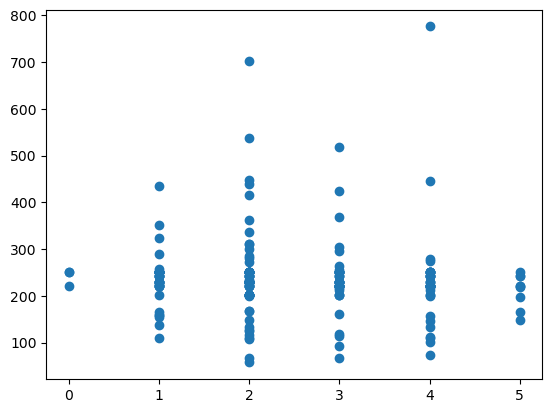

In [728]:
plt.scatter(X_train["residents"],y_train)


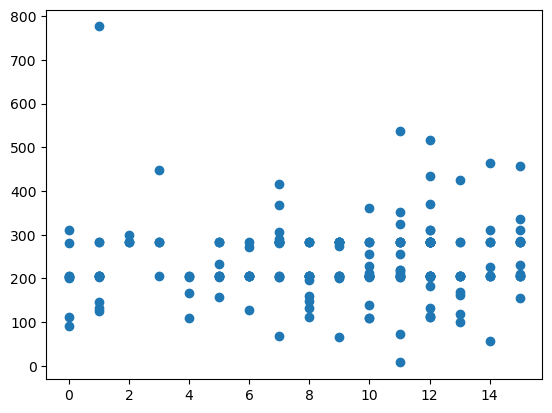

In [374]:
plt.scatter(X_train["income_band"],y_train)

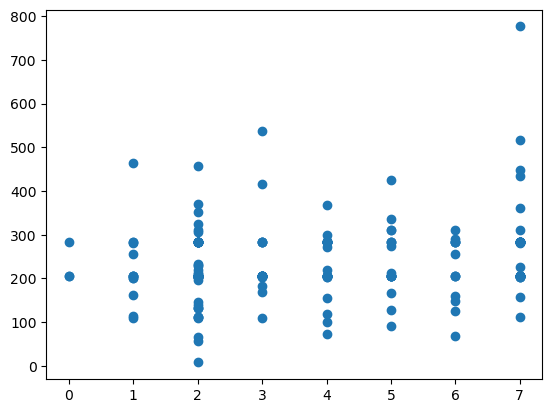

In [375]:
plt.scatter(X_train["occupied_days"],y_train)

In [65]:
appliance_df = mdi.metadata.appliances['appliance']

In [66]:
appliance_df

,applianceid,homeid,roomid,applianceclass,powertype,appliancetype,appliancesubtype,number
0,907,47,650,food,gas,gashob,gasCookingHobs,4
1,908,47,650,food,electric,fridgefreezer,combinedFridgeFreezer,1
2,909,47,650,food,electric,grill,grill,1
3,910,47,650,food,electric,toaster,toaster,1
4,911,47,650,food,electric,kettle,kettle,1
...,...,...,...,...,...,...,...,...
3435,5568,333,3024,food,electric,freezer,separateFreezer,1
3436,5566,333,3024,food,gas,gashob,gasCookingHobs,6
3437,5575,333,3025,water,gas,shower,showerBoiler,1
3438,5576,333,3025,water,gas,bath,bath,1


In [67]:
appliance_df = appliance_df[appliance_df.powertype == "electric"]
#appliance_df[appliance_df.homeid == 47]
sum_appliances = appliance_df.groupby(['homeid'])["number"].sum()
print(sum_appliances)
sum_appliances[335]


homeid
47      6
55      8
59      6
61      8
62      8
       ..
331    11
332    11
333     6
334    16
335    15
Name: number, Length: 256, dtype: int64


15

In [68]:
appliance_counts = []
for id in features.homeid:
    appliance_counts.append(sum_appliances[id])
features["appliances"] = appliance_counts
features

,homeid,install_type,income_band,residents,smart_automation,smart_monitors,unit_charge_pence_per_kwh,monthly_consumption,appliances
51,120,standard,1,1,Don't own,Don't own,13.015000,202.780,7
52,121,standard,1,2,Don't own,Don't own,14.723333,296.870,7
96,171,enhanced,1,0,NaN,Don't own,14.000000,241.955,16
110,182,standard,1,4,Don't own,Don't own,14.670000,444.820,9
137,216,standard,1,1,Don't own,Don't own,15.320000,57.580,9
...,...,...,...,...,...,...,...,...,...
184,261,standard,5,3,Own and use,Don't own,12.690000,220.130,13
213,287,standard,5,4,Don't own,Don't own,12.920000,219.470,12
217,295,standard,5,1,Don't own,Don't own,13.075781,220.130,11
227,316,standard,5,4,Don't own,Own and use,13.075781,220.130,13


In [703]:
#RANDOM FOREST - 4 variables

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
 
# create regressor object
regressor = RandomForestRegressor(n_estimators=100,
                                  random_state=42) 
                                
linReg = LinearRegression()

y = features["monthly_consumption"]
#X = consumption_df.drop(["homeid","clusters","carbon_intensity"],axis=1)
X = features[["appliances","appliances"]]
X_train, X_test = train_test_split(X, test_size=0.2)
y_train, y_test = train_test_split(y, test_size=0.2)
len(y_train)
# fit the regressor with x and y data
regressor.fit(X_train, y_train)
linReg.fit(X_train,y_train)
Y_pred = regressor.predict(X_test)
Y_pred1 = linReg.predict(X_test)
print('R2 Value:',metrics.r2_score(y_train, regressor.predict(X_train)))
print('Accuracy',100-(np.mean(np.round(np.abs((y_test - Y_pred) / y_test),2)) * 100))
print('R2 Value:',metrics.r2_score(y_train, linReg.predict(X_train)))
print('Accuracy',100-(np.mean(np.round(np.abs((y_test - Y_pred1) / y_test),2)) * 100))

R2 Value: 0.07666158777840804
Accuracy 83.92156862745098
R2 Value: 0.0029132191400685903
Accuracy 85.45098039215686


In [695]:
pickle.dump(model, open('/Users/athmika/work/Dissertation/app/models/model1.pkl', 'wb'))

In [863]:
# SOLAR ENERGY 
solar_data = pd.read_csv('/Users/athmika/work/Dissertation/data/solar_data.csv') 
solar_data


,Time,longitude
0,2017-06-13T00:00,0.0
1,2017-06-13T01:00,0.0
2,2017-06-13T02:00,0.0
3,2017-06-13T03:00,0.0
4,2017-06-13T04:00,0.0
...,...,...
9163,2018-06-29T19:00,277.0
9164,2018-06-29T20:00,164.0
9165,2018-06-29T21:00,61.0
9166,2018-06-29T22:00,10.0


In [63]:
regex = "20*T"
solar_data.columns

NameError: name 'solar_data' is not defined

In [678]:

regressor2 = LinearRegression() 

y2 = features["monthly_consumption"]
#X = consumption_df.drop(["homeid","clusters","carbon_intensity"],axis=1)
X2 = features[["appliances","residents","income_band"]]
X_train2, X_test2 = train_test_split(X2, test_size=0.3)
y_train2, y_test2 = train_test_split(y2, test_size=0.3)
# fit the regressor with x and y data
regressor2.fit(X_train2, y_train2)
#linReg.fit(X_train,y_train)
Y_pred2 = np.round(regressor2.predict(X_test2),2)
print('R2 Value:',metrics.r2_score(y_train2, regressor2.predict(X_train2)))
print('Accuracy',100-(np.mean(np.round(np.abs((y_test2 - Y_pred2) / y_test2))) * 100))

R2 Value: 0.01828045819020141
Accuracy 85.71428571428572


In [615]:
regressor2.predict([[7,8,3]])

/Users/athmika/miniconda/envs/IdealDataInterface/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([246.01676871])

In [955]:
def predict_consumption(appliances,residents,income_band):
    electricity_kwh = regressor2.predict([[appliances,residents,income_band]])
    return electricity_kwh[0]

consumption = predict_consumption(7,3,3)

/Users/athmika/miniconda/envs/IdealDataInterface/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [336]:
#daily standing pence = 50
from datetime import datetime
import calendar

def predict_cost(consumption, daily_standing_charge):
    now = datetime.now()
    days = calendar.monthrange(now.year, now.month)[1]
    print(days)
    minCost = round((daily_standing_charge*days + consumption*28)/100,2)
    maxCost = round((daily_standing_charge*days + consumption*30)/100,2)
    return [minCost,maxCost]
predict_cost(consumption)

def predict_carbon_emission():
    headers = {'Accept': 'application/json'}
    r = requests.get('https://api.carbonintensity.org.uk/intensity/2023-07-19', params={}, headers = headers)
    #print(r.json())
    return r.json()

predict_carbon_emission()

    


NameError: name 'consumption' is not defined

In [337]:
#saving the model
import pickle
pickle.dump(regressor2, open('model.pkl', 'wb'))

In [341]:
home_df.location.unique()

array(['Edinburgh', 'Midlothian', 'WestLothian', 'EastLothian', 'Fife'],
      dtype=object)

In [342]:
#features.drop(columns=["homeid","clusters"])
#features = features.drop(columns=["homeid","clusters"])

/var/folders/_0/0ph25fgd2sv30yzsv450ry5r0000gn/T/ipykernel_1421/3144607586.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_mat = features.corr()


<Axes: >

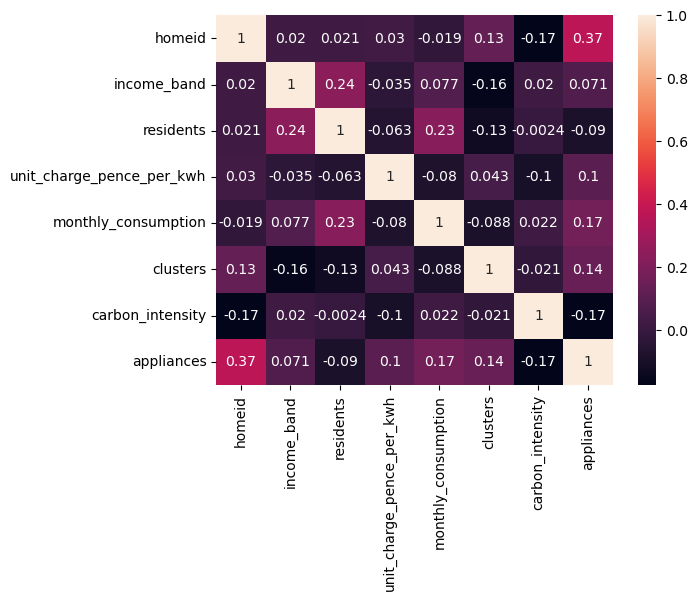

In [348]:
correlation_mat = features.corr()
sns.heatmap(correlation_mat, annot = True)

/var/folders/_0/0ph25fgd2sv30yzsv450ry5r0000gn/T/ipykernel_1421/654183117.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_less["carbon_emissions"] = features_less["monthly_consumption"] * features_less["carbon_intensity"]


Text(0, 0.5, 'Carbon emissions (nCO2)')

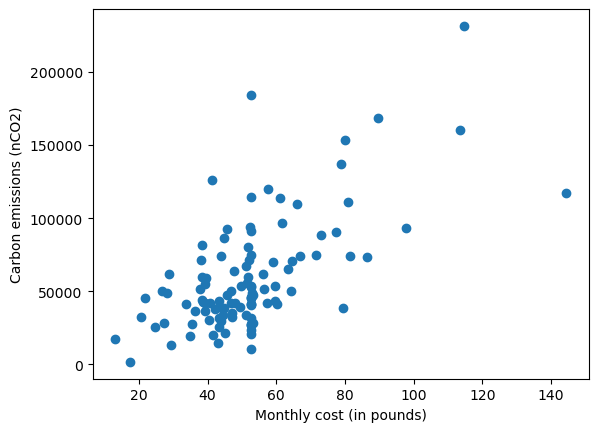

In [369]:
#COST ANALYSIS
mc = []
for id in features.homeid:
    if id in monthly_cost and monthly_cost[id] > 10:
        mc.append(monthly_cost[id])
    else:
        mc.append(np.nan)
features["monthly_cost"] = mc

features["monthly_cost"] = features['monthly_cost'].fillna(features['monthly_cost'].mean())
#features.monthly_cost = features['monthly_cost'].fillna(features['monthly_cost'].mean())
features_less = features[features.carbon_intensity.notna()]
#plt.scatter(features.monthly_cost,features.carbon_intensity)
carbon_emissions = []
features_less["carbon_emissions"] = features_less["monthly_consumption"] * features_less["carbon_intensity"]
plt.scatter(features_less.monthly_cost,features_less.carbon_emissions)
plt.xlabel("Monthly cost (in pounds)")
plt.ylabel("Carbon emissions (nCO2)")

In [370]:
features
features.to_csv("../../app/features.csv")

Text(0.5, 1.0, 'Consumption vs CO2 Emissions (Average Monthly)')

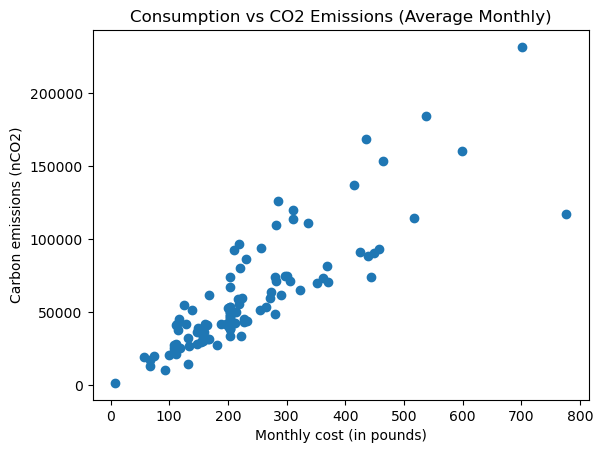

In [372]:
# CONSUMPTION VS CARBON EMISSIONS
plt.scatter(features_less.monthly_consumption,features_less.carbon_emissions)
plt.xlabel("Monthly consumption (in pounds)")
plt.ylabel("Carbon emissions (nCO2)")
plt.title("Consumption vs CO2 Emissions (Average Monthly)")

Text(0.5, 1.0, 'Monthly Tariff vs Unit Charge pence per kwh')

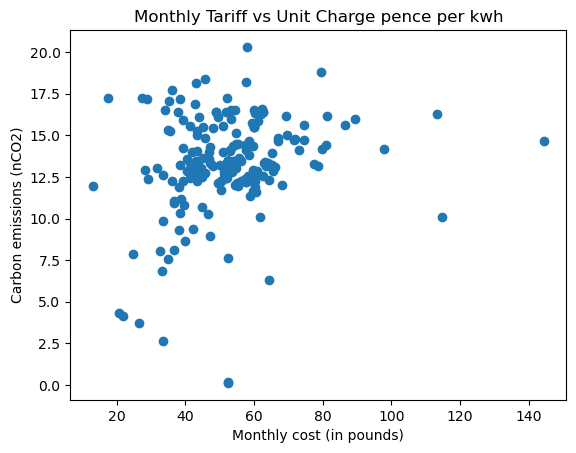

In [375]:


# COST VS UNIT CHARGE PENCE PER KWH
plt.scatter(features.monthly_cost,features.unit_charge_pence_per_kwh)
plt.xlabel("Monthly cost (in pounds)")
plt.ylabel("Unit charge pence per kwh (nCO2)")
plt.title("Monthly Tariff vs Unit Charge pence per kwh")

In [408]:
model = pickle.load(open('/Users/athmika/work/Dissertation/app/models/model1.pkl', 'rb'))
input = np.array([[3,2]])


prediction = model.predict(input)
prediction

/Users/athmika/miniconda/envs/IdealDataInterface/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([245.33839546])

In [89]:
import matplotlib.pyplot as plt
plt.figure()
#plt.scatter(features.homeid, features.appliances)
features.appliances.unique()
appliances_groupings = features.groupby(["appliances"])["appliances"].count()
list(appliances_groupings)


[3, 5, 6, 15, 20, 21, 31, 29, 24, 23, 21, 21, 12, 13, 4, 3, 1, 1, 1, 1]

<Figure size 640x480 with 0 Axes>

<BarContainer object of 20 artists>

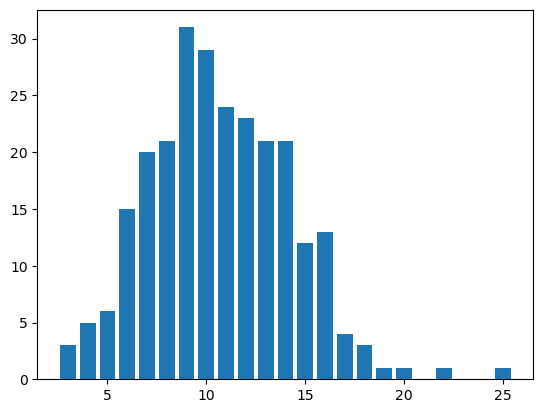

In [91]:
plt.bar(list(appliances_groupings.keys()),list(appliances_groupings))

In [95]:
plt.scatter(features.appliances, features.carbon_intensity)

AttributeError: 'DataFrame' object has no attribute 'carbon_intensity'